In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv("AutoData.csv")

## Exploratory Data Analysis

In [3]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 25)

In [5]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.dtypes

symboling             int64
make                 object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [150]:
df.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There are no null values in the dataset.

In [7]:
objdf = df.select_dtypes(include='object')
for i in objdf:
    print(df[i].value_counts())

toyota corolla                     6
toyota corona                      6
peugeot 504                        6
subaru dl                          4
mitsubishi outlander               3
mazda 626                          3
honda civic                        3
toyota mark ii                     3
mitsubishi g4                      3
mitsubishi mirage g4               3
volvo 145e (sw)                    2
bmw x3                             2
honda accord                       2
honda civic cvcc                   2
volkswagen dasher                  2
volvo 144ea                        2
subaru                             2
saab 99le                          2
mazda glc                          2
mazda glc deluxe                   2
mazda rx-4                         2
bmw 320i                           2
isuzu D-Max                        2
porsche cayenne                    2
saab 99gle                         2
toyota starlet                     2
nissan latio                       2
v

There are 147 unique values in the `make` column and so it will be unhelpful to convert into dummies and hence, can be dropped.

In [8]:
df.drop('make',axis=1, inplace=True)
objdf.drop('make', axis=1, inplace=True)

In [9]:
dumdf = pd.get_dummies(objdf, drop_first=False)
dumdf

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,0,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
newdf = pd.concat([df.select_dtypes(exclude='object'), dumdf], sort=True, axis=1)
newdf

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,...,0,0,0,0,0,0,0,1,0,0
5,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,...,0,0,0,0,0,0,0,1,0,0
6,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,...,0,0,0,0,0,0,0,1,0,0
7,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,...,0,0,0,0,0,0,0,1,0,0
8,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,...,0,0,0,0,0,0,0,1,0,0
9,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,...,0,0,0,0,0,0,0,1,0,0


In [11]:
newdf.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,...,-0.047012,0.245950,-0.037911,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,...,0.037803,-0.081174,-0.191073,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,...,0.100413,-0.057877,-0.297330,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,...,0.153516,-0.013699,-0.194078,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,...,-0.170181,-0.238720,-0.035289,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,...,0.187964,-0.039196,-0.233857,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,0.024052
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,...,0.335555,-0.184762,-0.169349,-0.442562,-0.166946,0.069594,0.049033,0.483520,0.004490,-0.013327
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,...,0.054482,0.000127,-0.292226,-0.353342,0.000110,0.054451,0.070030,0.419335,-0.004213,0.025977
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,...,-0.110878,-0.000187,0.141194,-0.234866,-0.000162,0.241829,0.144263,-0.110280,0.251259,-0.005688
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,...,0.023986,-0.026436,-0.053911,-0.183384,-0.022838,0.984356,-0.055528,-0.311035,-0.153726,-0.016654


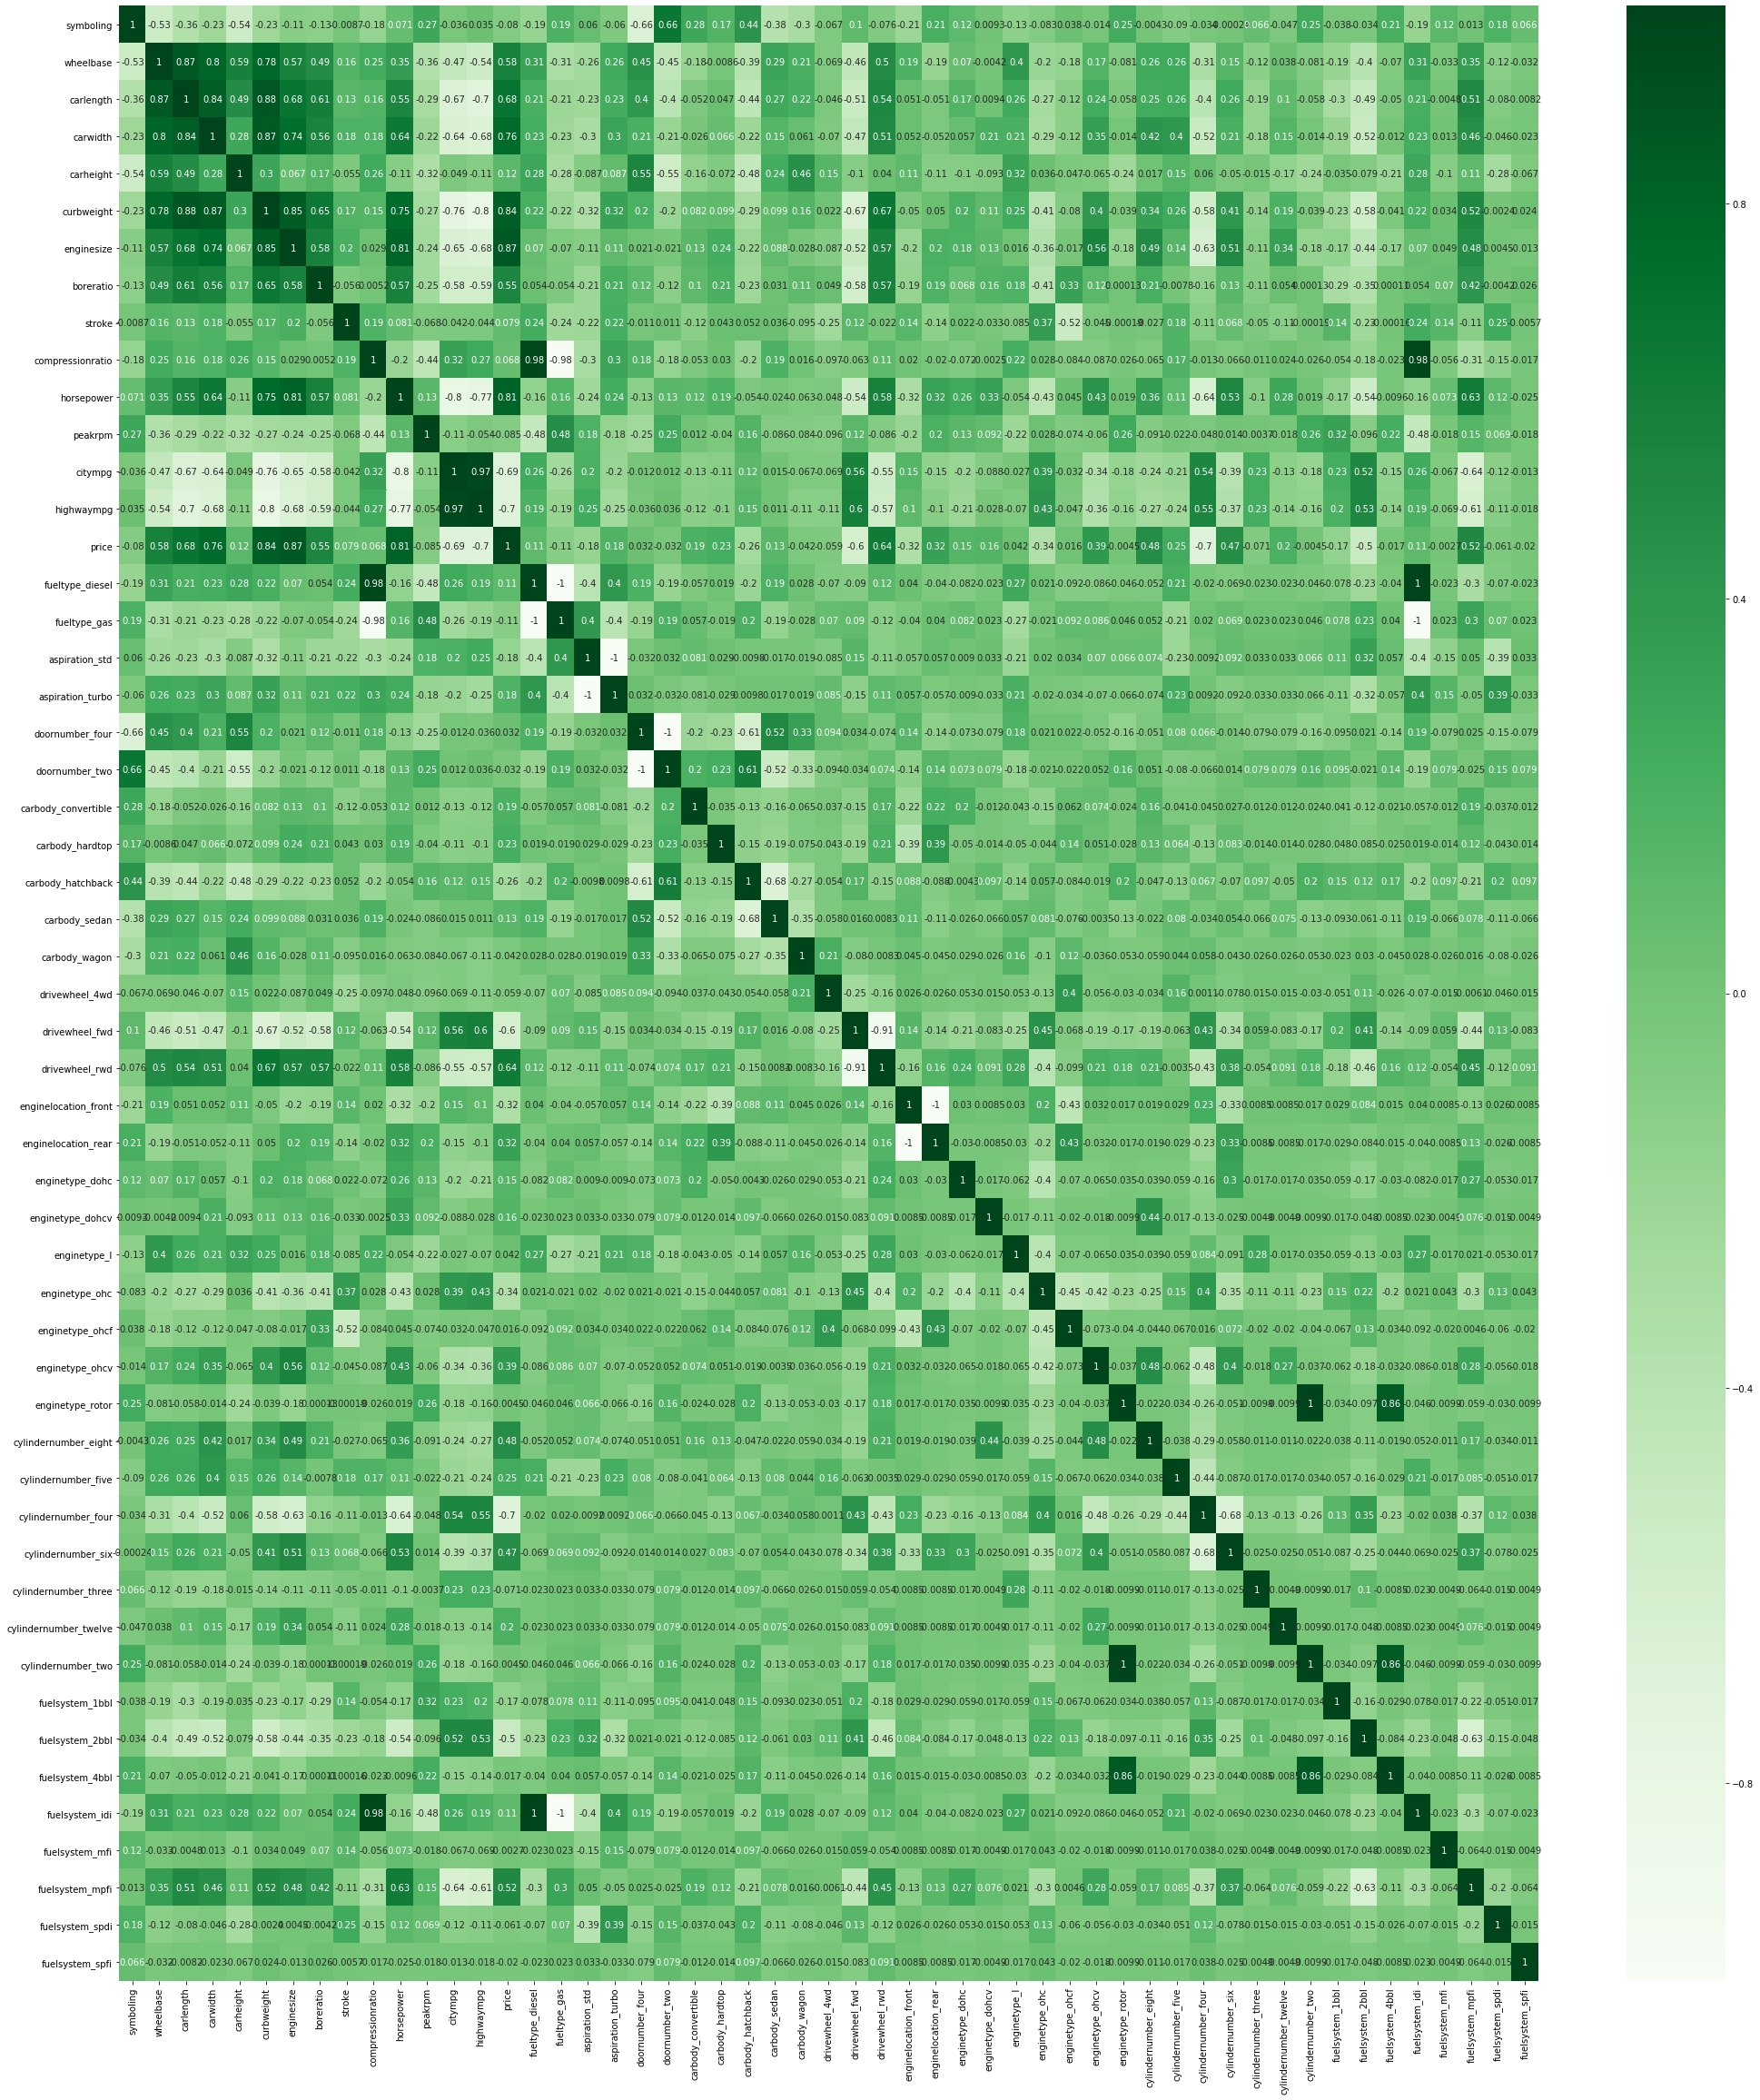

In [12]:
plt.figure(figsize=(35,40))
sns.heatmap(newdf.corr(), annot=True, cmap='Greens');

In [13]:
newdf.corr().unstack().sort_values(ascending=False).drop_duplicates()

fuelsystem_spfi      fuelsystem_spfi        1.000000
compressionratio     fueltype_diesel        0.984356
highwaympg           citympg                0.971337
carlength            curbweight             0.877728
wheelbase            carlength              0.874587
enginesize           price                  0.874145
carwidth             curbweight             0.867032
fuelsystem_4bbl      enginetype_rotor       0.863879
enginesize           curbweight             0.850594
carlength            carwidth               0.841118
price                curbweight             0.835305
horsepower           enginesize             0.809769
price                horsepower             0.808139
carwidth             wheelbase              0.795144
wheelbase            curbweight             0.776386
price                carwidth               0.759325
curbweight           horsepower             0.750739
enginesize           carwidth               0.735433
carlength            enginesize             0.

In [14]:
newdf.corr()['price'].sort_values()

cylindernumber_four     -0.697762
highwaympg              -0.697599
citympg                 -0.685751
drivewheel_fwd          -0.601950
fuelsystem_2bbl         -0.501374
enginetype_ohc          -0.344270
enginelocation_front    -0.324973
carbody_hatchback       -0.262039
aspiration_std          -0.177926
fuelsystem_1bbl         -0.170945
fueltype_gas            -0.105679
peakrpm                 -0.085267
symboling               -0.079978
cylindernumber_three    -0.071388
fuelsystem_spdi         -0.061475
drivewheel_4wd          -0.058866
carbody_wagon           -0.042310
doornumber_two          -0.031835
fuelsystem_spfi         -0.019580
fuelsystem_4bbl         -0.017306
cylindernumber_two      -0.004544
enginetype_rotor        -0.004544
fuelsystem_mfi          -0.002747
enginetype_ohcf          0.016285
doornumber_four          0.031835
enginetype_l             0.042267
compressionratio         0.067984
stroke                   0.079443
fueltype_diesel          0.105679
fuelsystem_idi

## Standardizing

In [28]:
sdf = df.select_dtypes(exclude='object')
cols = sdf.columns

In [19]:
scaler = MinMaxScaler()

In [36]:
sdf.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [41]:
sdf[cols] = scaler.fit_transform(sdf)

In [43]:
sdf.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.566829,0.354419,0.491780,0.467317,0.493740,0.414106,0.248707,0.564111,0.564483,0.196409,0.233821,0.398009,0.339431,0.388190,0.202540
std,0.249061,0.175562,0.184139,0.178767,0.203627,0.201971,0.157142,0.193460,0.149332,0.248253,0.164767,0.194688,0.181726,0.181222,0.198323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.230321,0.376119,0.316667,0.350000,0.254849,0.135849,0.435714,0.495238,0.100000,0.091667,0.265306,0.166667,0.236842,0.066283
50%,0.600000,0.303207,0.479104,0.433333,0.525000,0.359193,0.222642,0.550000,0.580952,0.125000,0.195833,0.428571,0.305556,0.368421,0.128519
75%,0.800000,0.460641,0.626866,0.550000,0.641667,0.561288,0.301887,0.742857,0.638095,0.150000,0.283333,0.551020,0.472222,0.473684,0.282632
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
newdf = pd.concat([sdf, dumdf], sort=True, axis=1)

In [58]:
newdf.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,1,0,0
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,...,0,0,0,0,0,0,0,1,0,0
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,...,0,0,0,0,0,0,0,1,0,0
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,...,0,0,0,0,0,0,0,1,0,0


## Train test split

In [59]:
y = newdf[['price']]

In [60]:
newdf.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,1,0,0
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,...,0,0,0,0,0,0,0,1,0,0
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,...,0,0,0,0,0,0,0,1,0,0
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,...,0,0,0,0,0,0,0,1,0,0


In [61]:
y.head()

,price
0,0.207959
1,0.282558
2,0.282558
3,0.219254
4,0.306142


In [62]:
df_train, df_test, y_train, y_test = train_test_split(newdf, y ,test_size=0.3, random_state=100)

In [63]:
df_train.shape, df_test.shape, y_train.shape, y_test.shape

((143, 53), (62, 53), (143, 1), (62, 1))

In [102]:
df_train.drop(['price'], axis=1, inplace=True)
df_test.drop(['price'], axis=1, inplace=True)

## Simple Linear Regression

In [103]:
X_train = df_train[['enginesize']]
X_test = df_test[['enginesize']]

In [104]:
reg = LinearRegression().fit(X_train, y_train)

In [105]:
reg.coef_, reg.intercept_

(array([[1.08790115]]), array([-0.0654968]))

Therefore, the equation formed is-

$price = 1.087*enginesize - 0.065$

In [106]:
y_train_pred = reg.predict(X_train)

In [107]:
r2_score(y_train, y_train_pred)

0.7532760476929091

In [108]:
y_test_pred = reg.predict(X_test)

In [109]:
r2_score(y_test, y_test_pred)

0.7835830184011544

## Multiple Linear Regression

In [110]:
df_train

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.6,0.206997,0.391045,0.291667,0.250000,0.272692,0.139623,0.307143,0.552381,0.150000,...,0,0,0,1,0,0,0,0,0,0
125,1.0,0.230321,0.414925,0.666667,0.200000,0.500388,0.339623,1.000000,0.495238,0.156250,...,0,0,0,0,0,0,0,1,0,0
166,0.6,0.230321,0.411940,0.308333,0.400000,0.314973,0.139623,0.500000,0.480952,0.150000,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,...,0,0,0,0,0,0,0,1,0,0
199,0.2,0.516035,0.711940,0.575000,0.808333,0.647401,0.260377,0.771429,0.514286,0.031250,...,0,0,0,0,0,0,0,1,0,0
190,1.0,0.230321,0.367164,0.308333,0.300000,0.284329,0.181132,0.464286,0.633333,0.093750,...,0,0,0,0,0,0,0,1,0,0
96,0.6,0.230321,0.361194,0.291667,0.558333,0.187355,0.135849,0.435714,0.580952,0.150000,...,0,0,0,1,0,0,0,0,0,0
177,0.2,0.460641,0.514925,0.516667,0.508333,0.376261,0.230189,0.550000,0.700000,0.106250,...,0,0,0,0,0,0,0,1,0,0
181,0.2,0.521866,0.697015,0.516667,0.525000,0.645074,0.377358,0.521429,0.609524,0.137500,...,0,0,0,0,0,0,0,1,0,0
97,0.6,0.230321,0.434328,0.291667,0.475000,0.212956,0.135849,0.435714,0.580952,0.150000,...,0,0,0,1,0,0,0,0,0,0


In [111]:
X_train = df_train[['cylindernumber_four','curbweight','enginesize','horsepower','highwaympg','citympg','carwidth','carlength']]
X_test = df_test[['cylindernumber_four','curbweight','enginesize','horsepower','highwaympg','citympg','carwidth','carlength']]

In [112]:
X_train.shape, X_test.shape

((143, 8), (62, 8))

In [113]:
lr1 = LinearRegression().fit(X_train, y_train)

In [114]:
lr1.coef_, lr1.intercept_

(array([[-0.08186001,  0.27521872,  0.38702861,  0.15764655,  0.10463953,
         -0.05989299,  0.19121674, -0.04955478]]), array([-0.06846663]))

In [115]:
y_train_pred = lr1.predict(X_train)

In [116]:
r2_score(y_train, y_train_pred)

0.845939367815053

In [117]:
y_test_pred = lr1.predict(X_test)

In [118]:
r2_score(y_test, y_test_pred)

0.8068156293412464

## RFE (Recursive Feature Elimination)

In [119]:
lr2= LinearRegression()

In [120]:
rfe_selector = RFE(lr2, 8, verbose=True)

In [121]:
rfe_selector.fit(df_train, y_train)

Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 fe

C:\Applications\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=8, step=1, verbose=True)

In [122]:
rfe_selector.support_

array([False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False])

In [123]:
rfe_selector.ranking_

array([27,  6, 29,  1, 21,  1,  1,  9,  3, 24,  2, 11, 14,  8, 22, 20, 26,
       12, 37, 41,  7, 28, 30, 43, 36, 42, 31, 25,  1,  1, 19, 18, 23,  5,
       15, 10,  1, 33, 35, 16, 34,  1,  1,  4, 38, 39, 32, 17, 44, 40, 13,
       45])

In [124]:
cols_keep = df_train.columns[rfe_selector.support_]

In [125]:
cols_keep

Index(['carwidth', 'curbweight', 'enginesize', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_three',
       'cylindernumber_twelve'],
      dtype='object')

In [126]:
lr2 = LinearRegression()

In [127]:
lr2.fit(df_train[cols_keep],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [154]:
lr2.coef_, lr2.intercept_

(array([[ 0.25259831,  0.16106728,  0.73059339, -0.1706794 ,  0.1706794 ,
          0.16160996,  0.16931886, -0.16608203]]), array([0.00217977]))

In [1]:
y_train_pred = lr2.predict(df_train[cols_keep])

NameError: name 'lr2' is not defined

In [129]:
r2_score(y_train, y_train_pred)

0.8586796295064401

In [130]:
y_test_pred = lr2.predict(df_test[cols_keep])

In [131]:
r2_score(y_test, y_test_pred)

0.8734041969816063

The features selected by RFE give almost equal R-squared score for the train dataset and better R-squared score for the test dataset. So, we shall proceed with the features selected by RFE.

## VIF (Variance Inflation Factor)

In [146]:
[variance_inflation_factor(X_train.values, z) for z in range(8)]

[4.421889186471198,
 8.145504362324843,
 6.587338663668809,
 8.154144729678098,
 1.1290314999462092,
 1.2226299089210473,
 1.0500289841236223,
 1.4212284505379114]

In [149]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,8.15
3,enginelocation_front,8.15
2,enginesize,6.59
0,carwidth,4.42
7,cylindernumber_twelve,1.42
5,enginetype_rotor,1.22
4,enginelocation_rear,1.13
6,cylindernumber_three,1.05


From the above values of VIF, it can be seen that `curbweight` and `enginelocation_front` might be collinear with other explanatory variables.

## OLS (Ordinary Least Squares)

In [132]:
X_train = df_train[cols_keep]
X_test = df_test[cols_keep]

Adding intercept manually

In [137]:
X_train_sm = sm.add_constant(X_train);

In [138]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [139]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     117.2
Date:                Thu, 19 Dec 2019   Prob (F-statistic):           3.59e-54
Time:                        23:19:00   Log-Likelihood:                 172.15
No. Observations:                 143   AIC:                            -328.3
Df Residuals:                     135   BIC:                            -304.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0015      0.028      0.052      0.959      -0.054       0.057
carwidth                  0.2526      0.071      3.535      0.001       0.111       0.394
curbweight                0.1611      0.085      1.901      0.059      -0.006       0.329
enginesize                0.7306      0.104      7.019      0.000       0.525       0.936
enginelocation_front     -0.1700      0.028     -6.179      0.000      -0.224      -0.116
enginelocation_rear       0.1714      0.052      3.268      0.001       0.068       0.275
enginetype_rotor          0.1616      0.042      3.857      0.000       0.079       0.244
cylindernumber_three      0.1693      0.077      2.204      0.029       0.017       0.321
cylindernumber_twelve    -0.1661      0.089     -1.858      0.065      -0.343       0.011
==============================================================================
Omnibus:                       38.321   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.659
Skew:                           0.905   Prob(JB):                     6.38e-32
Kurtosis:                       7.564   Cond. No.                     9.80e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.64e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The p-value for all the features is below the limit of 0.05 except for `cylindernumber_twelve` which has a p-value of 0.065 which is still small enough to be passable.

## Conclusion

1. The variables `carwidth`, `curbweight`, `enginesize`, `enginelocation_front`, `enginelocation_rear`, `enginetype_rotor`, `cylindernumber_three`, `cylindernumber_twelve` are big factors that affect the price of a car. Out of these, `cylindernumber_twelve` can be said to have the lowest chance of effect which can be seen from its comparitively higher p-value than the other variables.

$price = carwidth*0.25 + curbweight*0.16 + enginesize*0.73 - enginelocation_front*0.17 +enginelocation_rear*0.17 +enginetype_rotor*0.161 + cylindernumber_three*0.169 - cylindernumber_twelve*0.16 + 0.002$

2. It can be seen from the equation formed that the variable that has the highest impact on the price of a car is the `enginesize`. That is followed by `carwidth` and then other several variables. But the `enginesize` variable has almost thrice the impact of the second most impactful variable.

3. The R-squared value with the selected variables is `0.859` and the adjusted R-squared value is `0.851` which is a very small difference.